In [513]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

# <font color='green'>Step1:Data Understanding</font>

In [514]:
# Read the data from csv file

house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [515]:
# Describe the data
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [516]:
# Get information about the data
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## <font color='orange'>NULL value check and imputation</font>

In [517]:
#Check for Null values
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [518]:
#Drop columns with large number of Null values and Id column which does not add any value
#PoolArea has all values 0 except seven records so let us drop it as well
drop_variables = ['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature','PoolArea']
house =house.drop(drop_variables, axis = 1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,12,2008,WD,Normal,250000


In [519]:
house.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [520]:
#Handling Null values for features whose absence means that feature is not present 
#NaN values for below fields means that respective feature is not present hence replacing it with NA or 0
house['GarageCond'] = house['GarageCond'].replace(np.NaN, 'NA')
house['GarageQual'] = house['GarageQual'].replace(np.NaN, 'NA')
house['GarageType'] = house['GarageType'].replace(np.NaN, 'NA')
house['GarageFinish'] = house['GarageFinish'].replace(np.NaN, 'NA')
house['GarageYrBlt'] = house['GarageYrBlt'].replace(np.NaN, 0.0)
house['BsmtCond'] = house['BsmtCond'].replace(np.NaN, 'NA')
house['BsmtQual'] = house['BsmtQual'].replace(np.NaN, 'NA')
house['BsmtFinType1'] = house['BsmtFinType1'].replace(np.NaN, 'NA')
house['BsmtFinType2'] = house['BsmtFinType2'].replace(np.NaN, 'NA')
house['BsmtExposure'] = house['BsmtExposure'].replace(np.NaN, 'NA')
house['MasVnrArea'] = house['MasVnrArea'].replace(np.NaN, 0.0)
house['MasVnrType'] = house['MasVnrType'].replace(np.NaN, 'NA')

In [521]:
#Impute LotFrontage missing value with its median
house.LotFrontage = house.LotFrontage.fillna(house.LotFrontage.median())

In [522]:
#Electrical is categorical and has only one record which is Null, so replacing it with mode
house.Electrical = house.Electrical.fillna(house.Electrical.mode()[0])    

In [523]:
#Again check missing values
house.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

##### <font color='red'>Observation:</font>
All the missing values are handled using Imputation 

## <font color='green'>Step2:Data Visualization and EDA</font>

In [524]:
#Get numeric variables
numeric_var = house.select_dtypes(include=['float64','int64'])
numeric_var = numeric_var.columns

In [525]:
#Get categorical variables
categorical_var = house.select_dtypes(include=['object'])
categorical_var = categorical_var.columns

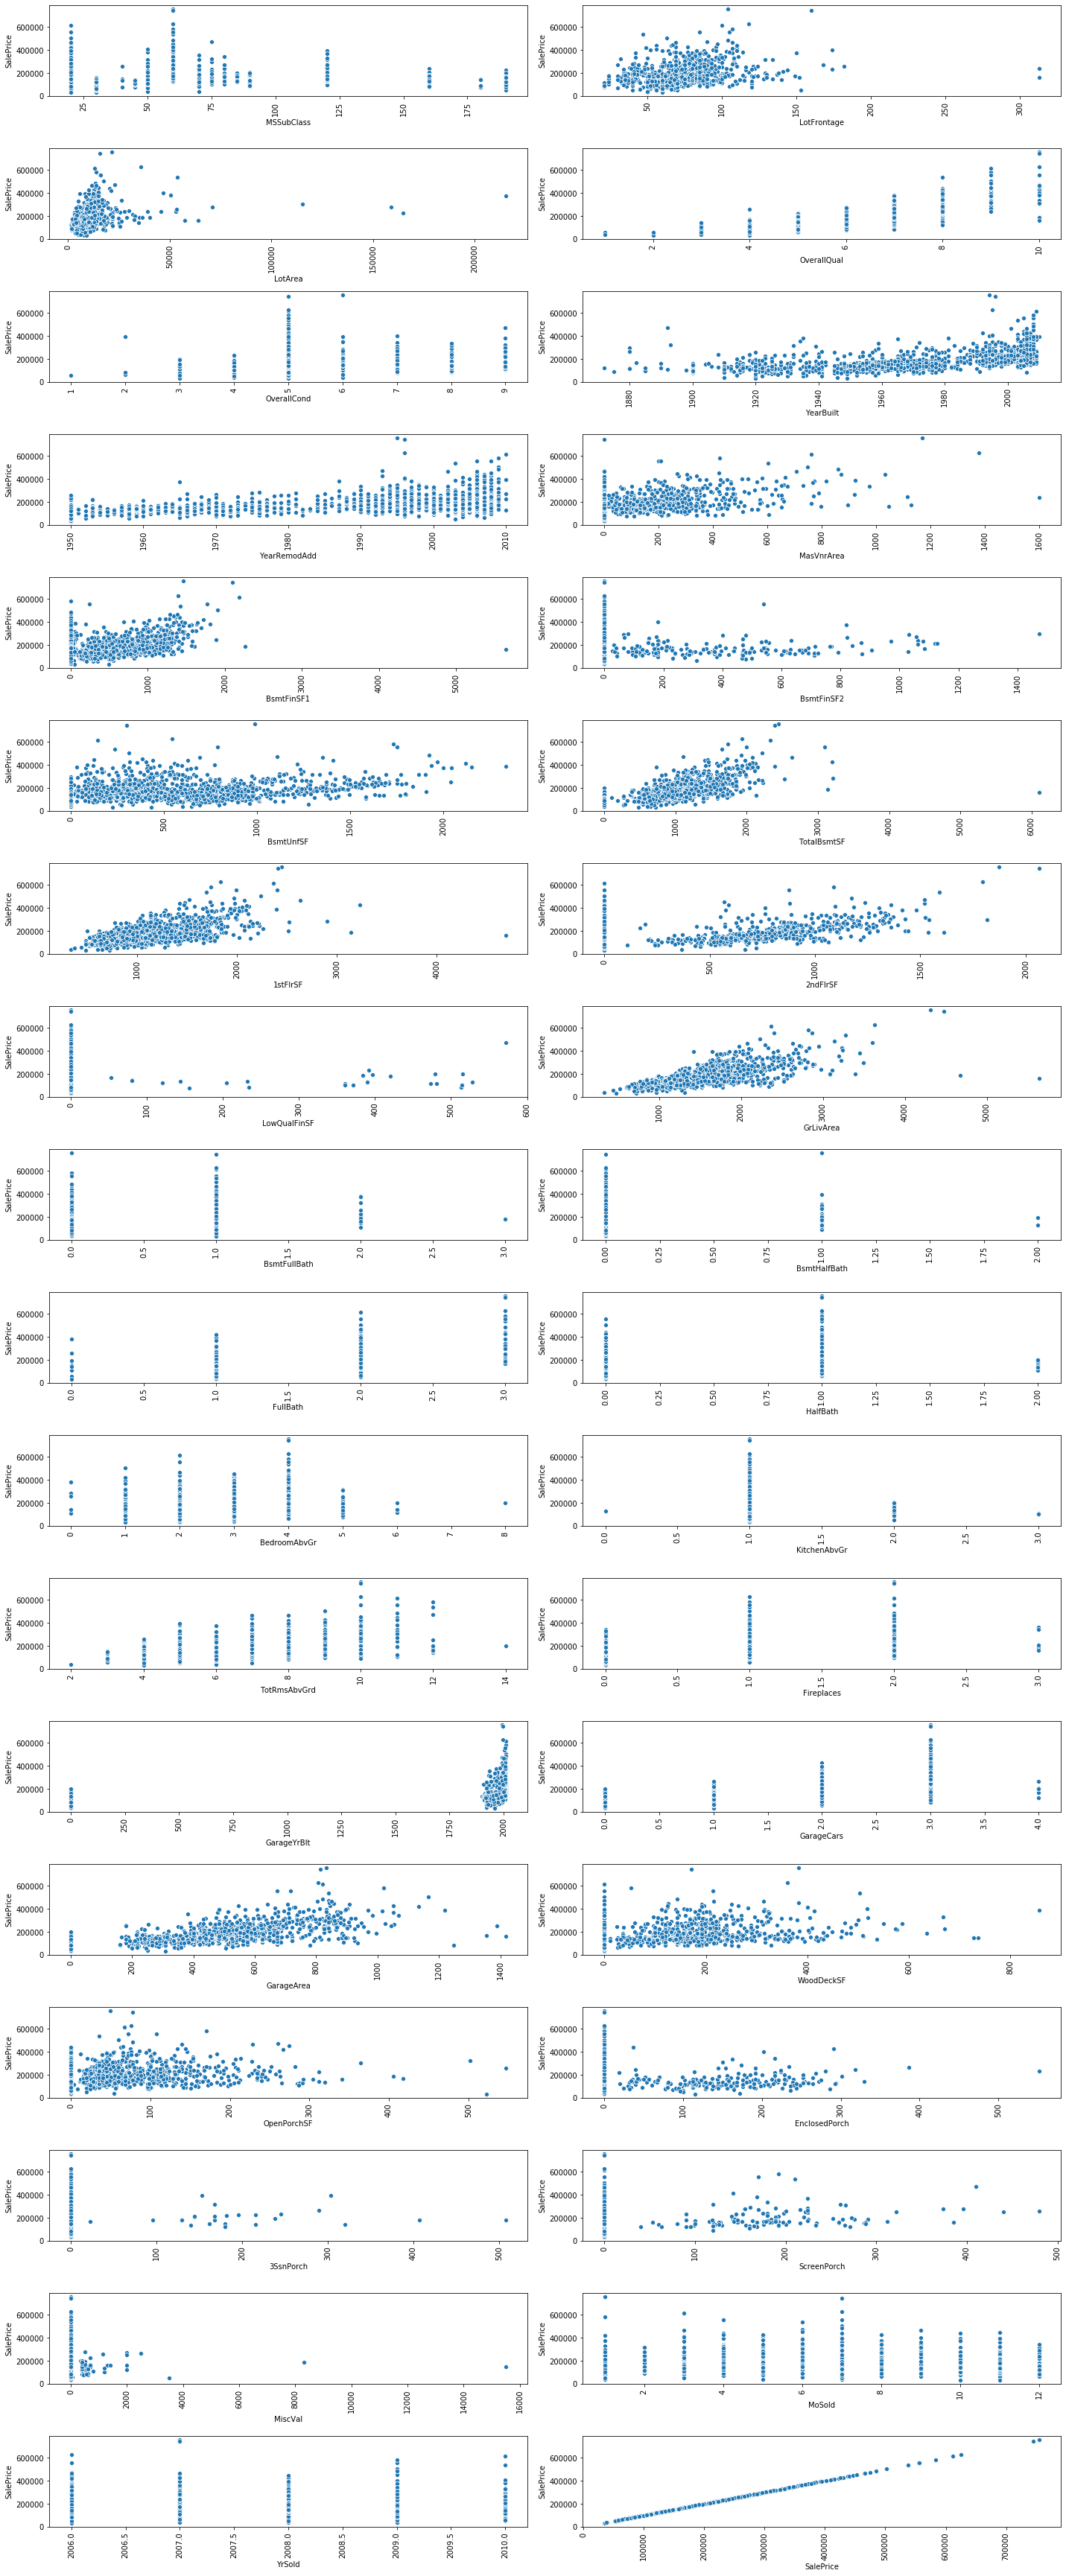

In [526]:
# Build Pairplot graphs to visualize relationship with target variable
plt.figure(figsize = (20,50))
j = 1
for i in numeric_var :
    plt.subplot(len(numeric_var)//2+1,2,j)
    sns.scatterplot(y='SalePrice',x=i,data=house)
    plt.xticks(rotation = 'vertical')
    j+=1
plt.tight_layout()
plt.show()

##### <font color='red'>Observation:</font>
SalePrice increases with increase in area-1stFlrSF,2ndFlrSF,GrLivArea,GarageArea.

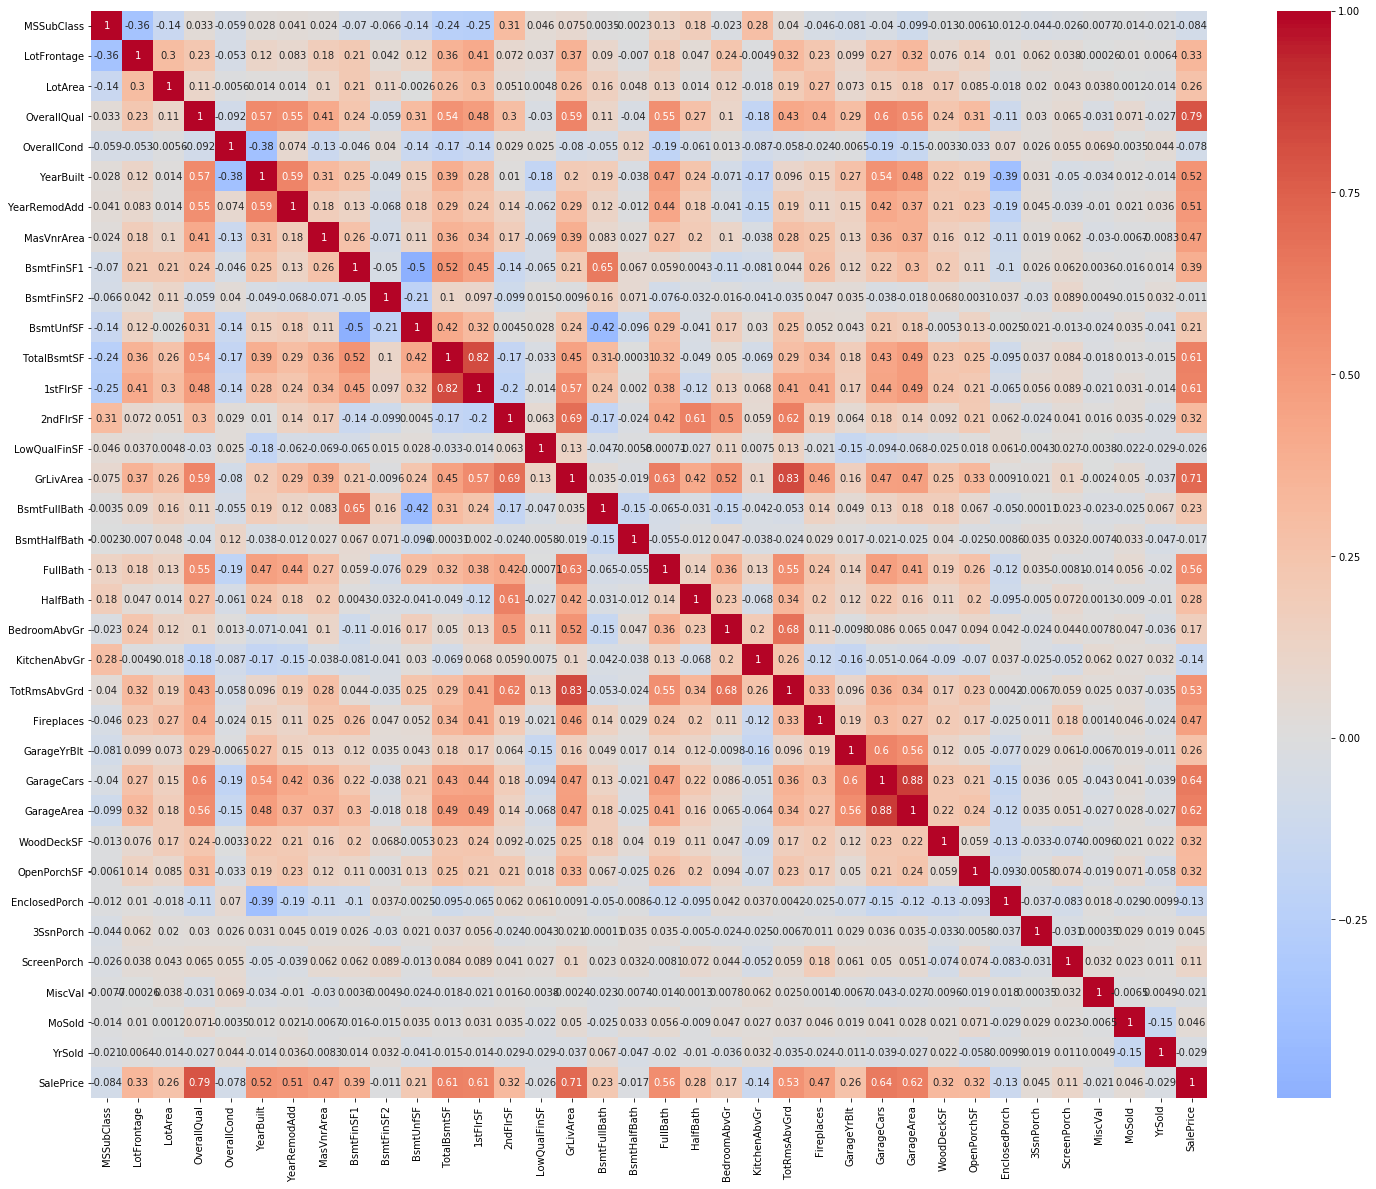

In [527]:
# Find out correlation between variables including target variable
plt.figure(figsize = (25,20))
sns.heatmap(house[numeric_var].corr(),annot = True, cmap="coolwarm" ,center = 0)
plt.show()

##### <font color='red'>Observation:</font>
1.SalePrice has high Correlation with OverallQual,TotalBsmtSF,1stFlrSF,,GrLivArea,GarageCars,GarageArea.  

2.TotalRmsAbvGrd has high correlation with GrLivArea.

In [528]:
#Remove target variable
numeric_var=numeric_var[numeric_var != 'SalePrice']
numeric_var

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold'], dtype='object')

In [529]:
#Visualize Categorical variables
categorical_var

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

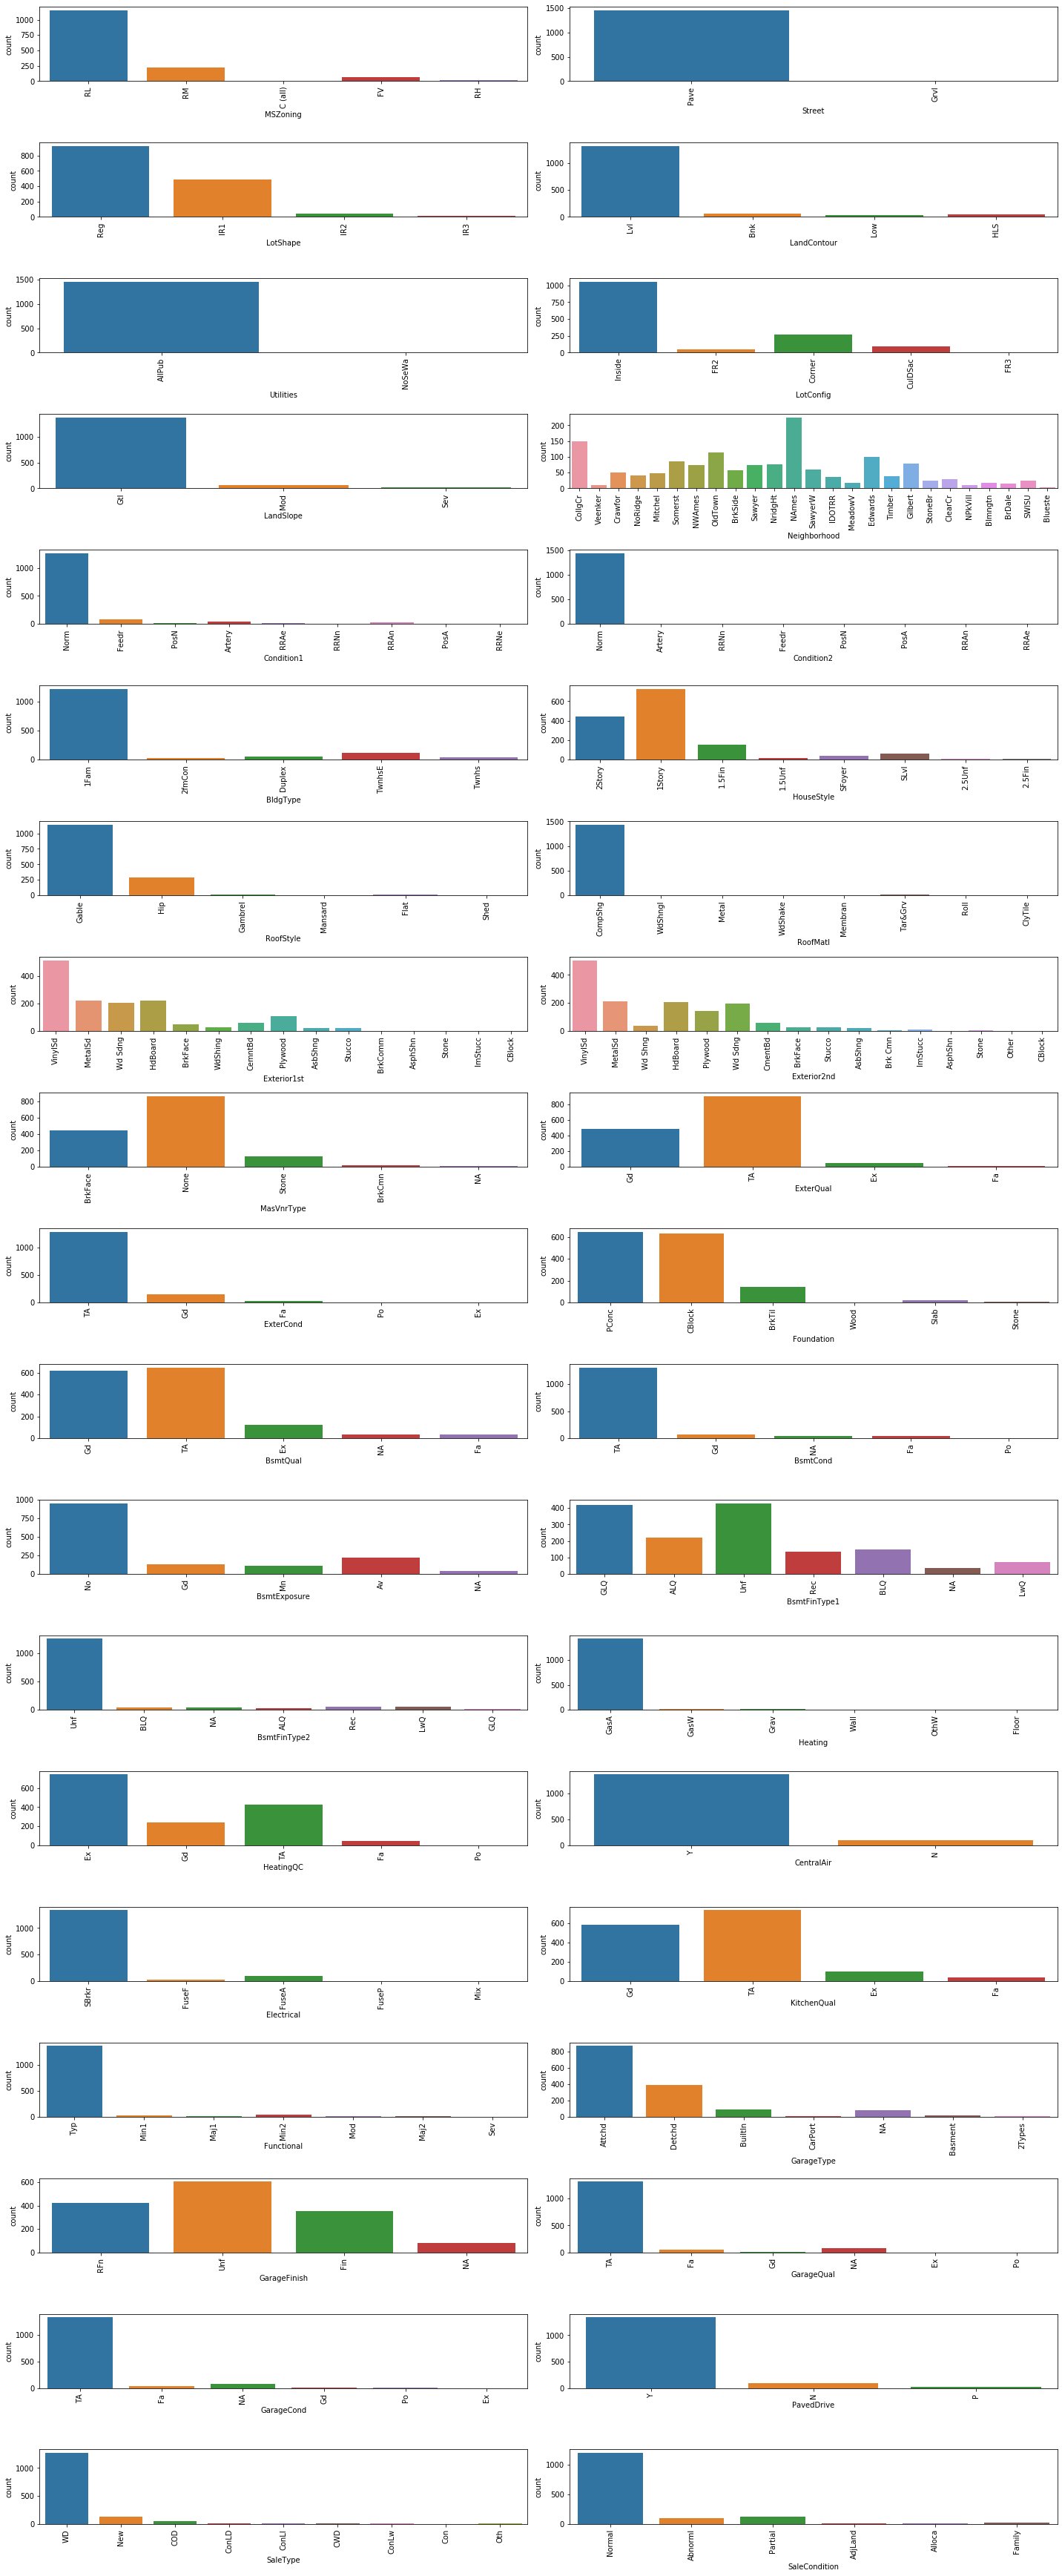

In [530]:
# Build Countplot graphs to visualize categorical variables
plt.figure(figsize = (20,50))
j = 1
for i in categorical_var :
    plt.subplot(len(categorical_var)//2+1,2,j)
    sns.countplot(x=i,data=house)
    plt.xticks(rotation = 'vertical')
    j+=1
plt.tight_layout()
plt.show()

##### <font color='red'>Observation:</font>
1.Residential Low Density(RL) is the prevelant Zoning type

2.Most of the properties have access to Paved street rather than Gravel street. 

3.Prevelant shape of property is Regular(Reg)

4.Almost all properties have all public utilities(AllPub).

5.The popular choice of building type is Single-Family Detatched(1Fam).

6.1Story house style is most common.

7.Standard (Composite) Shingle(CompShg) is the popular go to option for Roof Material.

8.Most of the houses have Central Air Conditioning(CentralAir).

9.Most houses have attached garage.

10.Sale Type- 'Warranty Deed - Conventional' and SaleCondition- 'Normal' are the most common.

# <font color='green'>Step3:Data Preparation</font>

## <font color='orange'>Dummy Variables</font>

In [531]:
#Create dummy variables for categorical variables
categorical = house.select_dtypes(include=['object'])
dummies = pd.get_dummies(categorical, drop_first=True)
#Join dummies to original data
house = pd.concat([house, dummies], axis=1)
#Drop the variables for which dummies are created
house = house.drop(categorical, axis = 1)
house.shape

(1460, 242)

In [532]:
house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

# <font color='green'>Step4:Test-Train Split</font>

In [533]:
#Split into train and test set
train,test = train_test_split(house, train_size=0.7 , test_size = 0.3, random_state =100 )

In [534]:
#Check shape of train set
train.shape

(1021, 242)

In [535]:
#Check shape of test set
test.shape

(438, 242)

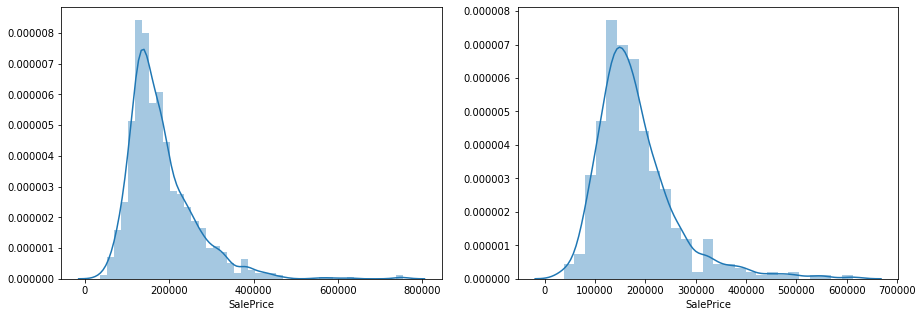

In [536]:
#Check the distribution after split
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train.SalePrice)
plt.subplot(1,2,2)
sns.distplot(test.SalePrice)

##### <font color='red'>Observation:</font>
Both the training and test set seem to have similar distribution 

# <font color='green'>Step5:Feature Scaling</font>

In [537]:
#create object of Standard Scaler
scaler= StandardScaler()
#Do feature scaling for numeric variables in the training set
train[numeric_var] = scaler.fit_transform(train[numeric_var])

In [538]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+0

# <font color='green'>Step6:Recursive Feature Elimination(RFE) </green>

In [539]:
#Create X and y variable from training set
y_train = train.pop('SalePrice')
X_train = train

In [540]:
#Define the Linear Regression model and fit it on training data
lm = LinearRegression()
lm.fit(X_train, y_train)
#Define RFE with 35 features
rfe = RFE(lm, 35)
rfe = rfe.fit(X_train, y_train)

In [541]:
#Get the list of features with rank
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 207),
 ('LotFrontage', False, 148),
 ('LotArea', False, 60),
 ('OverallQual', False, 20),
 ('OverallCond', False, 82),
 ('YearBuilt', False, 50),
 ('YearRemodAdd', False, 149),
 ('MasVnrArea', False, 139),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 177),
 ('BsmtHalfBath', False, 196),
 ('FullBath', False, 206),
 ('HalfBath', False, 163),
 ('BedroomAbvGr', False, 137),
 ('KitchenAbvGr', False, 118),
 ('TotRmsAbvGrd', False, 169),
 ('Fireplaces', False, 183),
 ('GarageYrBlt', False, 6),
 ('GarageCars', False, 95),
 ('GarageArea', False, 164),
 ('WoodDeckSF', False, 176),
 ('OpenPorchSF', False, 173),
 ('EnclosedPorch', False, 194),
 ('3SsnPorch', False, 187),
 ('ScreenPorch', False, 188),
 ('MiscVal', False, 192),
 ('MoSold', False, 190),
 ('YrSold', False, 181),
 ('MSZoning_FV', F

In [542]:
#Get the list of columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_Other', 'ExterCond_Po', 'BsmtQual_NA', 'BsmtCond_NA', 'BsmtFinType1_NA', 'GarageType_NA', 'GarageFinish_NA', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_NA', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_NA', 'GarageCond_Po', 'GarageCond_TA', 'SaleType_New', 'SaleCondition_Partial'], dtype='object')

In [543]:
#Get the list of columns rejected by RFE
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'], dtype='object', length=206)

In [544]:
#Get new training set with RFE selected features
X_train_new = X_train[col]

# <font color='green'>Step7:Ridge Regression </green>

In [545]:
#Ridge regression with GridSearchCV
ridge = Ridge()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
#Set number of folds
folds = 5
cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [546]:
#Print best parameters
print(cv.best_params_)
print(cv.best_score_)

{'alpha': 20}
-29219.581895507385


##### <font color='red'>Observation:</font>
The optimal value of lambda(alpha in GridSearchCV) for Ridge Regression is 20

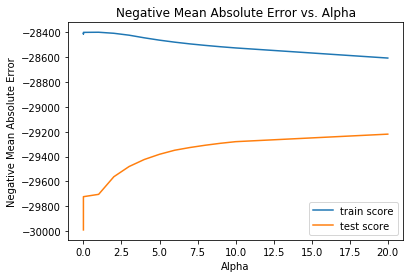

In [547]:
#Plot graph of Negative mean absolute error for alpha values till 20
output = pd.DataFrame(cv.cv_results_)
output = output[output['param_alpha']<=20]
output['param_alpha'] = output['param_alpha'].astype('int32')
#Plot the graph 
plt.plot(output['param_alpha'], output['mean_train_score'])
plt.plot(output['param_alpha'], output['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error vs. Alpha")
plt.legend(['train score', 'test score'])
plt.show()

In [548]:
#Do feature scaling for numeric variables in the test set
test[numeric_var] = scaler.transform(test[numeric_var])
test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.

In [549]:
#Create X and y variable from test set
y_test = test.pop('SalePrice')
X_test = test

In [550]:
# Using Ridge regression:
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)

# Making predictions using Ridge regression
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [551]:
# Calculate metrics-R2 score, RSS and RMSE for Ridge Regression
metrics1=[]
print('\nR2_score for Training set:')
print(metrics.r2_score(y_train,y_train_pred))
metrics1.append(metrics.r2_score(y_train,y_train_pred))

print('\nR2_score for Test set:')
print(metrics.r2_score(y_test,y_test_pred))
metrics1.append(metrics.r2_score(y_test,y_test_pred))

print('\nRSS for Training set:')
print(np.sum(np.square(y_train - y_train_pred)))
metrics1.append(np.sum(np.square(y_train - y_train_pred)))

print('\nRSS for Test set:')
print(np.sum(np.square(y_test - y_test_pred)))
metrics1.append(np.sum(np.square(y_test - y_test_pred)))

print('\nRMSE for Training set:')
print((metrics.mean_squared_error(y_train, y_train_pred)**0.5))
metrics1.append((metrics.mean_squared_error(y_train, y_train_pred)**0.5))

print('\nRMSE for Test set:')
print((metrics.mean_squared_error(y_test, y_test_pred)**0.5))
metrics1.append((metrics.mean_squared_error(y_test, y_test_pred)**0.5))


R2_score for Training set:
0.8847908533436425

R2_score for Test set:
0.8694658564320115

RSS for Training set:
735114863758.9976

RSS for Test set:
367938226113.6371

RMSE for Training set:
26832.721990166498

RMSE for Test set:
28983.47136096005


In [552]:
#Print Ridge Coefficients
ridge.coef_

array([-7.26982332e+03, -2.72462812e+03,  3.88942071e+03,  1.62708956e+04,
        5.41378970e+03,  5.65965871e+03,  2.14147773e+03,  4.52486957e+03,
       -5.41898216e+01,  1.14108690e+03,  1.40385266e+03,  1.74156825e+03,
        5.96245755e+03,  1.33513485e+04, -1.19207049e+03,  1.52767237e+04,
        5.38533867e+03,  7.26666961e+02,  3.62750111e+03,  8.78959315e+02,
       -1.76804909e+03, -3.15967910e+03,  2.41008543e+03,  2.89237796e+03,
       -2.82910175e+03,  1.01652475e+04, -1.32650793e+02,  2.07252010e+03,
       -7.47227980e+02,  6.62874869e+02,  1.49118748e+03,  1.28674815e+03,
       -1.35656410e+02, -6.04322259e+02, -1.13142893e+03,  3.45590638e+03,
        1.47151477e+03,  4.47372833e+03, -2.62384909e+03,  3.77299327e+03,
        1.43491994e+03, -8.07777762e+03,  4.86536087e+02,  7.17037277e+03,
        4.75280055e+03,  1.05502580e+04, -1.87116853e+03,  7.13225391e+03,
       -6.15745927e+03, -1.39112221e+03, -1.33525376e+03,  5.77939569e+03,
       -9.42215578e+02, -

## <font color='orange'>Top features:Ridge Regression</font>

In [553]:
#Get the Ridge Coefficients and sort it as per descending order
parameter = list(ridge.coef_)
parameter.insert(0,ridge.intercept_)
column = train.columns
column.insert(0,'constant')
ridge_coefficient = pd.DataFrame(list(zip(column,parameter)))
ridge_coefficient.columns = ['Features','Coefficients']
ridge_coefficient.sort_values(by='Coefficients',ascending=False).head(10)

,Features,Coefficients
0,MSSubClass,166961.891777
68,Neighborhood_NridgHt,23421.150210
69,Neighborhood_OldTown,18694.256799
4,OverallCond,16270.895641
16,BsmtFullBath,15276.723677
169,BsmtExposure_Mn,14372.455690
115,Exterior1st_AsphShn,13487.984629
59,Neighborhood_Edwards,13380.012874
14,LowQualFinSF,13351.348483
79,Condition1_PosA,10965.292780


##### <font color='red'>Observation:Top Features as per Ridge Regression are:</font>
1.MSSubClass

2.Neighborhood_NridgHt

3.Neighborhood_OldTown

4.OverallCond

5.BsmtFullBath

6.BsmtExposure_Mn

7.Exterior1st_AsphShn

8.Neighborhood_Edwards

9.LowQualFinSF

10.Condition1_PosA

# <font color='green'>Step8:Lasso Regression </green>

In [554]:
#Lasso regression with GridSearchCV
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
#Set number of folds
folds = 5
cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    7.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [555]:
#Print best parameters
print(cv.best_params_)
print(cv.best_score_)

{'alpha': 500}
-29313.63344457178


##### <font color='red'>Observation:</font>
The optimal value of lambda(alpha in GridSearchCV) for Lasso Regression is 500

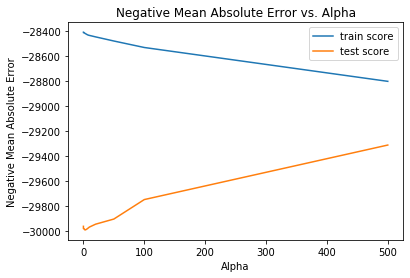

In [556]:
#Plot graph of Negative mean absolute error for alpha values till 500
output = pd.DataFrame(cv.cv_results_)
output = output[output['param_alpha']<=500]
output['param_alpha'] = output['param_alpha'].astype('int32')
#Plot the graph 
plt.plot(output['param_alpha'], output['mean_train_score'])
plt.plot(output['param_alpha'], output['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error vs. Alpha")
plt.legend(['train score', 'test score'])
plt.show()

In [557]:
# Using Lasso regression
lasso = Lasso(alpha=500)
lasso.fit(X_train, y_train)

# Making predictions using Lasso regression
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [558]:
# Calculate metrics-R2 score, RSS and RMSE for Lasso Regression
metrics2=[]
print('\nR2_score for Training set:')
print(metrics.r2_score(y_train,y_train_pred))
metrics2.append(metrics.r2_score(y_train,y_train_pred))

print('\nR2_score for Test set:')
print(metrics.r2_score(y_test,y_test_pred))
metrics2.append(metrics.r2_score(y_test,y_test_pred))

print('\nRSS for Training set:')
print(np.sum(np.square(y_train - y_train_pred)))
metrics2.append(np.sum(np.square(y_train - y_train_pred)))

print('\nRSS for Test set:')
print(np.sum(np.square(y_test - y_test_pred)))
metrics2.append(np.sum(np.square(y_test - y_test_pred)))

print('\nRMSE for Training set:')
print((metrics.mean_squared_error(y_train, y_train_pred)**0.5))
metrics2.append((metrics.mean_squared_error(y_train, y_train_pred)**0.5))

print('\nRMSE for Test set:')
print((metrics.mean_squared_error(y_test, y_test_pred)**0.5))
metrics2.append((metrics.mean_squared_error(y_test, y_test_pred)**0.5))


R2_score for Training set:
0.8558056834459389

R2_score for Test set:
0.8514560341302329

RSS for Training set:
920060502527.9138

RSS for Test set:
418702737905.0431

RMSE for Training set:
30018.93790976093

RMSE for Test set:
30918.31696558072


In [559]:
#Print Lasso Coefficients
lasso.coef_

array([-7.27137211e+03, -1.87638213e+03,  3.35192158e+03,  1.99432701e+04,
        5.11935968e+03,  8.21752711e+03,  2.77959552e+03,  3.38393211e+03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  3.64513751e+03,
        0.00000000e+00,  9.46761908e+01, -1.62770996e+03,  2.49728695e+04,
        5.34256317e+03,  2.65657198e+02,  2.72900264e+03,  4.80451533e+02,
       -1.01973372e+03, -2.99065399e+03,  7.22626945e+02,  3.40616445e+03,
       -3.04800857e+03,  9.97029881e+03,  0.00000000e+00,  1.95515061e+03,
       -0.00000000e+00,  0.00000000e+00,  1.02338411e+03,  1.30046389e+03,
       -0.00000000e+00, -8.17847419e+01, -6.39221258e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -3.79565894e+03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.91774168e+03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -

## <font color='orange'>Top features:Lasso Regression</font>

In [560]:
#Get the Lasso Coefficients and sort it as per descending order
parameter = list(lasso.coef_)
parameter.insert(0,lasso.intercept_)
column = train.columns
column.insert(0,'constant')
lasso_coefficient = pd.DataFrame(list(zip(column,parameter)))
lasso_coefficient.columns = ['Features','Coefficients']
lasso_coefficient.sort_values(by='Coefficients',ascending=False).head(10)

,Features,Coefficients
0,MSSubClass,189350.355301
68,Neighborhood_NridgHt,29963.047980
16,BsmtFullBath,24972.869513
69,Neighborhood_OldTown,20341.917596
4,OverallCond,19943.270051
169,BsmtExposure_Mn,12589.025312
79,Condition1_PosA,10745.795627
26,GarageArea,9970.298814
59,Neighborhood_Edwards,8543.233121
6,YearRemodAdd,8217.527115


##### <font color='red'>Observation:Top Features as per Lasso Regression are:</font>
1.MSSubClass

2.Neighborhood_NridgHt

3.BsmtFullBath

4.Neighborhood_OldTown

5.OverallCond

6.BsmtExposure_Mn

7.Condition1_PosA

8.GarageArea

9.Neighborhood_Edwards

10.YearRemodAdd

# <font color='green'>Step9:Ridge  vs. Lasso Regression </green>

In [561]:
#Comparison of metrics

regression_table = {'Metrics': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
            'Ridge Regression': metrics1
        }
ridge_metric = pd.DataFrame(regression_table ,columns = ['Metrics', 'Ridge Regression'] )
lasso_metric = pd.Series(metrics2, name = 'Lasso Regression')
final_metric = pd.concat([ridge_metric, lasso_metric], axis = 1)

final_metric

,Metrics,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.847909e-01,8.558057e-01
1,R2 Score (Test),8.694659e-01,8.514560e-01
2,RSS (Train),7.351149e+11,9.200605e+11
3,RSS (Test),3.679382e+11,4.187027e+11
4,RMSE (Train),2.683272e+04,3.001894e+04
5,RMSE (Test),2.898347e+04,3.091832e+04


##### <font color='red'>Observation:</font>
1.Ridge Regression performs only slightly better(on basis of R2 score) than Lasso on both Training and Test set.

2.Both the Ridge and Lasso models perform well with minimal overfitting.

3.Lasso Regression performs slightly better than Ridge in terms of no overfitting as R2 score for Training and Test set is same.

In [562]:
#Comparison of Coefficients(beta)
betas = pd.DataFrame(index=X_train.columns)
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(100)

,Ridge,Lasso
MSSubClass,-7269.823320,-7271.372106
LotFrontage,-2724.628119,-1876.382134
LotArea,3889.420708,3351.921578
OverallQual,16270.895641,19943.270051
OverallCond,5413.789700,5119.359679
YearBuilt,5659.658712,8217.527115
YearRemodAdd,2141.477730,2779.595519
MasVnrArea,4524.869574,3383.932110
BsmtFinSF1,-54.189822,0.000000
BsmtFinSF2,1141.086899,-0.000000


##### <font color='red'>Observation:</font>
1.Lasso Regression has set many of the Coefficients(beta) to zero.

2.Lasso Regression plays a role in feature selection by setting some coeffients to zero, hence preventing the model to be too complex.

# <font color='green'>Step10:Subjective Questions </green>

##### <font color='blue'>Question 1:</font>
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

##### <font color='blue'>Answer:</font>
As found above the optimal value of alpha of Ridge=20, Lasso=500
Let us double the values of alpha to Ridge=40 ,Lasso=1000.
Let us rebuild Ridge and Lasso model by doubling alpha values.
Answer will be provided in pdf document.

## <font color='orange'>Double Alpha:Ridge Regression</font>

In [563]:
# Using Ridge regression:
ridge = Ridge(alpha=40)
ridge.fit(X_train, y_train)

# Making predictions using Ridge regression
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
# Calculate metrics-R2 score, RSS and RMSE for Ridge Regression
metrics1=[]
print('\nR2_score for Training set:')
print(metrics.r2_score(y_train,y_train_pred))
metrics1.append(metrics.r2_score(y_train,y_train_pred))

print('\nR2_score for Test set:')
print(metrics.r2_score(y_test,y_test_pred))
metrics1.append(metrics.r2_score(y_test,y_test_pred))

print('\nRSS for Training set:')
print(np.sum(np.square(y_train - y_train_pred)))
metrics1.append(np.sum(np.square(y_train - y_train_pred)))

print('\nRSS for Test set:')
print(np.sum(np.square(y_test - y_test_pred)))
metrics1.append(np.sum(np.square(y_test - y_test_pred)))

print('\nRMSE for Training set:')
print((metrics.mean_squared_error(y_train, y_train_pred)**0.5))
metrics1.append((metrics.mean_squared_error(y_train, y_train_pred)**0.5))

print('\nRMSE for Test set:')
print((metrics.mean_squared_error(y_test, y_test_pred)**0.5))
metrics1.append((metrics.mean_squared_error(y_test, y_test_pred)**0.5))


R2_score for Training set:
0.8736167259059219

R2_score for Test set:
0.8671768113399009

RSS for Training set:
806413605286.0652

RSS for Test set:
374390386197.30597

RMSE for Training set:
28103.865096904028

RMSE for Test set:
29236.493825811704


In [564]:
#Get the Ridge Coefficients and sort it as per descending order
parameter = list(ridge.coef_)
parameter.insert(0,ridge.intercept_)
column = train.columns
column.insert(0,'constant')
ridge_coefficient = pd.DataFrame(list(zip(column,parameter)))
ridge_coefficient.columns = ['Features','Coefficients']
ridge_coefficient.sort_values(by='Coefficients',ascending=False).head(10)

,Features,Coefficients
0,MSSubClass,173485.934734
4,OverallCond,17035.035748
68,Neighborhood_NridgHt,16604.843881
69,Neighborhood_OldTown,14172.003328
16,BsmtFullBath,13960.826882
169,BsmtExposure_Mn,11991.803108
14,LowQualFinSF,11582.501423
79,Condition1_PosA,9927.346708
26,GarageArea,9471.741830
59,Neighborhood_Edwards,9406.161837


##### <font color='red'>Observation:After doubling alpha</font>
1.In top 10 features,Feature -Exterior1st_AsphShn is replaced by GarageArea but rest features still remain in top 10,also order of top 10 features is slighltly rearranged.

2.There is a very slight decrease in the R2 scoring metrics for both Training and Test set.

## <font color='orange'>Double Alpha:Lasso Regression</font>

In [565]:
# Using Lasso regression
lasso = Lasso(alpha=1000)
lasso.fit(X_train, y_train)

# Making predictions using Ridge regression
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Calculate metrics-R2 score, RSS and RMSE for Lasso Regression
metrics2=[]
print('\nR2_score for Training set:')
print(metrics.r2_score(y_train,y_train_pred))
metrics2.append(metrics.r2_score(y_train,y_train_pred))

print('\nR2_score for Test set:')
print(metrics.r2_score(y_test,y_test_pred))
metrics2.append(metrics.r2_score(y_test,y_test_pred))

print('\nRSS for Training set:')
print(np.sum(np.square(y_train - y_train_pred)))
metrics2.append(np.sum(np.square(y_train - y_train_pred)))

print('\nRSS for Test set:')
print(np.sum(np.square(y_test - y_test_pred)))
metrics2.append(np.sum(np.square(y_test - y_test_pred)))

print('\nRMSE for Training set:')
print((metrics.mean_squared_error(y_train, y_train_pred)**0.5))
metrics2.append((metrics.mean_squared_error(y_train, y_train_pred)**0.5))

print('\nRMSE for Test set:')
print((metrics.mean_squared_error(y_test, y_test_pred)**0.5))
metrics2.append((metrics.mean_squared_error(y_test, y_test_pred)**0.5))


R2_score for Training set:
0.8289356777370761

R2_score for Test set:
0.8319083180036169

RSS for Training set:
1091509915696.3965

RSS for Test set:
473802130290.8663

RMSE for Training set:
32696.477834440477

RMSE for Test set:
32889.816410176696


In [566]:
#Get the Lasso Coefficients and sort it as per descending order
parameter = list(lasso.coef_)
parameter.insert(0,lasso.intercept_)
column = train.columns
column.insert(0,'constant')
lasso_coefficient = pd.DataFrame(list(zip(column,parameter)))
lasso_coefficient.columns = ['Features','Coefficients']
lasso_coefficient.sort_values(by='Coefficients',ascending=False).head(10)

,Features,Coefficients
0,MSSubClass,182977.419591
16,BsmtFullBath,25386.130770
4,OverallCond,23403.502850
69,Neighborhood_OldTown,11307.027295
26,GarageArea,10234.283703
6,YearRemodAdd,8150.885689
68,Neighborhood_NridgHt,7713.698984
79,Condition1_PosA,7653.997334
169,BsmtExposure_Mn,6174.992344
17,BsmtHalfBath,5184.566798


##### <font color='red'>Observation:After doubling alpha</font>
1.In top 10 features,Feature -Neighborhood_Edwards is replaced by BsmtHalfBath but rest features still remain in top 10,also order of top 10 features is slighltly rearranged.

2.There is a decrease in the R2 scoring metrics for both Training and Test set.

##### <font color='blue'>Question 3:</font>
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

##### <font color='blue'>Answer:</font>
Top 5 features are-MSSubClass,Neighborhood_NridgHt,BsmtFullBath,Neighborhood_OldTown,OverallCond.
Let us rebuild the model without top five predictor variables.

In [567]:
#Drop top 5 features
X_train1 = X_train.drop(['MSSubClass','Neighborhood_NridgHt','BsmtFullBath','Neighborhood_OldTown','OverallCond'], axis=1)
X_test1 = X_test.drop(['MSSubClass','Neighborhood_NridgHt','BsmtFullBath','Neighborhood_OldTown','OverallCond'], axis=1)

In [568]:
# Using Lasso regression
lasso = Lasso(alpha=500)
lasso.fit(X_train1, y_train)

# Making predictions using Ridge regression
y_train_pred = lasso.predict(X_train1)
y_test_pred = lasso.predict(X_test1)

# Calculate metrics-R2 score, RSS and RMSE for Lasso Regression
metrics2=[]
print('\nR2_score for Training set:')
print(metrics.r2_score(y_train,y_train_pred))
metrics2.append(metrics.r2_score(y_train,y_train_pred))

print('\nR2_score for Test set:')
print(metrics.r2_score(y_test,y_test_pred))
metrics2.append(metrics.r2_score(y_test,y_test_pred))

print('\nRSS for Training set:')
print(np.sum(np.square(y_train - y_train_pred)))
metrics2.append(np.sum(np.square(y_train - y_train_pred)))

print('\nRSS for Test set:')
print(np.sum(np.square(y_test - y_test_pred)))
metrics2.append(np.sum(np.square(y_test - y_test_pred)))

print('\nRMSE for Training set:')
print((metrics.mean_squared_error(y_train, y_train_pred)**0.5))
metrics2.append((metrics.mean_squared_error(y_train, y_train_pred)**0.5))

print('\nRMSE for Test set:')
print((metrics.mean_squared_error(y_test, y_test_pred)**0.5))
metrics2.append((metrics.mean_squared_error(y_test, y_test_pred)**0.5))


R2_score for Training set:
0.8445456420019521

R2_score for Test set:
0.8454647704343448

RSS for Training set:
991907435451.6226

RSS for Test set:
435590387957.27563

RMSE for Training set:
31168.9880068448

RMSE for Test set:
31535.671907257372


In [569]:
#Get the Lasso Coefficients and sort it as per descending order
parameter = list(lasso.coef_)
parameter.insert(0,lasso.intercept_)
column = X_train1.columns
column.insert(0,'constant')
lasso_coefficient = pd.DataFrame(list(zip(column,parameter)))
lasso_coefficient.columns = ['Features','Coefficients']
lasso_coefficient.sort_values(by='Coefficients',ascending=False).head(5)

,Features,Coefficients
0,LotFrontage,186043.477870
65,Neighborhood_SWISU,27889.766230
14,BsmtHalfBath,22653.488244
3,YearBuilt,21159.814885
164,BsmtExposure_Mn,13518.640134


##### <font color='red'>Observation:After dropping top 5 features in Lasso</font>
1.Slight drop in R2 score in both Training and Test set(from 0.85 to 0.84).

2.An increase in RMSE on Test set from 30918 to 31535.

3.Five most important predictor variables now are-LotFrontage, Neighborhood_SWISU, BsmtHalfBath, YearBuilt, BsmtExposure_Mn.